In [1]:
import ex3_loader
import ex3_generator
import numpy as np
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
PATH_TRAIN='../data/ex3Train.pklz'

x0=np.array([[1],[-1]])

N=100; n0=10; dimX=2; eta=0.04; dimY=2

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=ex3_loader.load_data_wrapper(PATH_TRAIN)

# Prepare test data to predict
test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),2)
len(training_data)

16956

### Build network

In [12]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([n0*dimY, 32, 16, 8, 8, dimX])
epoch=200

In [13]:
tcMSE_EpochAdalr1,tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.001, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.005, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr10, tcRel_EpochAdalr10, ecMSE_EpochAdalr10, ecRel_EpochAdalr10, w_EpochAdalr10, b_EpochAdalr10, EpochAdalr10\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.01, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0010608009804291265
Epoch 0: 0.721599817196932
The eta of Epoch 1 is 0.0011183436809362726
Epoch 1: 0.6841990820863654
The eta of Epoch 2 is 0.0011845970729350195
Epoch 2: 0.6406286092383251
The eta of Epoch 3 is 0.001273447996119866
Epoch 3: 0.5845971447913219
The eta of Epoch 4 is 0.0013919159153063096
Epoch 4: 0.5119973328704467
The eta of Epoch 5 is 0.0015058701945484107
Epoch 5: 0.431495900380791
The eta of Epoch 6 is 0.0015670236219221304
Epoch 6: 0.36699035008924136
The eta of Epoch 7 is 0.0015978947441607513
Epoch 7: 0.32905946935078206
The eta of Epoch 8 is 0.0016233644615914358
Epoch 8: 0.30671503054983623
The eta of Epoch 9 is 0.0016448658439432876
Epoch 9: 0.2911147559054344
The eta of Epoch 10 is 0.0016691860746411982
Epoch 10: 0.2794145986247856
The eta of Epoch 11 is 0.0016920041597352571
Epoch 11: 0.27072907956491454
The eta of Epoch 12 is 0.0017330534971866864
Epoch 12

In [14]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, epoch, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5, tcRel_constlr5, ecMSE_constlr5, ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, epoch, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr10, tcRel_constlr10, ecMSE_constlr10, ecRel_constlr10, w_constlr10, b_constlr10, constlr10\
=net.SGD_Constlr(training_data, epoch, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.7212885118104592
The eta of Epoch 1 is 0.001
Epoch 1: 0.6870868332075203
The eta of Epoch 2 is 0.001
Epoch 2: 0.6479266873840748
The eta of Epoch 3 is 0.001
Epoch 3: 0.6033808026895766
The eta of Epoch 4 is 0.001
Epoch 4: 0.5494756999626295
The eta of Epoch 5 is 0.001
Epoch 5: 0.49011785824666315
The eta of Epoch 6 is 0.001
Epoch 6: 0.4318284173032608
The eta of Epoch 7 is 0.001
Epoch 7: 0.3855989666104158
The eta of Epoch 8 is 0.001
Epoch 8: 0.3522967658895809
The eta of Epoch 9 is 0.001
Epoch 9: 0.3302151667916055
The eta of Epoch 10 is 0.001
Epoch 10: 0.31537036137177155
The eta of Epoch 11 is 0.001
Epoch 11: 0.303401575974785
The eta of Epoch 12 is 0.001
Epoch 12: 0.29399242610665366
The eta of Epoch 13 is 0.001
Epoch 13: 0.2861128634776677
The eta of Epoch 14 is 0.001
Epoch 14: 0.27940709515029233
The eta of Epoch 15 is 0.001
Epoch 15: 0.27430624577671303
The e

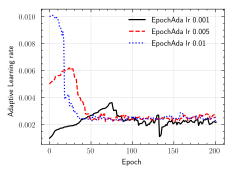

In [27]:
epochs=np.linspace(0,epoch+1,epoch+1)
plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(epochs,EpochAdalr1, epochs,EpochAdalr5,epochs, EpochAdalr10,linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Adaptive Learning rate")
plt.savefig("../img/ex3-lr.pdf", dpi=600,bbox_inches = 'tight')

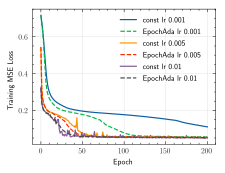

In [28]:
Epochs=np.linspace(0,epoch,epoch)
plt.style.reload_library()
with plt.style.context(['science','ieee','std-colors']):    
    plt.plot(Epochs, tcMSE_constlr1, Epochs, tcMSE_EpochAdalr1,"--", Epochs, tcMSE_constlr5,\
         Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr10, Epochs, tcMSE_EpochAdalr10,'--',linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Training MSE Loss")
plt.savefig("../img/ex3-loss.pdf", dpi=600,bbox_inches = 'tight')

### Compute relative errors

In [20]:
from sklearn.metrics import mean_squared_error

def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label,label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and RelErr are: {0},{1}".format(mseErr, RelErr))

Repeat Monte Carlo 256 times to compute the average relative error on new-generated data

In [18]:
N_sample=256

TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
P= np.array([[0.98,0.02],[0.02,0.98]])

for i in range(N_sample):
    alpha=ex3_generator.mChain(N,P)
    datas1, labels1, x_new1=ex3_generator.generate_new_data(data_mean, data_std, alpha)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [21]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr6=net.predict(TotalDatas, w_constlr10, b_constlr10, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr10=net.predict(TotalDatas, w_EpochAdalr10, b_EpochAdalr10, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr6, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr10, TotalLabels, label_mean, label_std, dimX)

MSE and RelErr are: 0.5787911423176283,0.1560912523857257
MSE and RelErr are: 0.27986335337969726,0.11069821979895392
MSE and RelErr are: 0.2756880988404272,0.10917723887182743
MSE and RelErr are: 0.2952494340028071,0.1125426432258617
MSE and RelErr are: 0.2831782320478723,0.11028796077140028
MSE and RelErr are: 0.2907875771867069,0.11351420134351169


## Plot sample path

According to the evolution of the adaptive learning rate, it converges to around 0.0025.
We retrain the model with learning rate 0.0025.

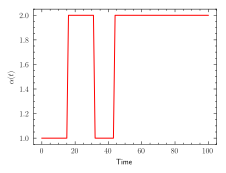

In [31]:
np.random.seed(6)
ru=np.random.uniform(0,1,size=N)
P= np.array([[0.98,0.02],[0.02,0.98]])
alpha=ex3_generator.mChain(N,P,ru)

datas, labels, x_new =ex3_generator.generate_new_data(data_mean, data_std, alpha)

plt.style.reload_library()
with plt.style.context(['science','ieee']):
    plt.plot(alpha,'r')
    plt.xlabel("Time")
    plt.ylabel(r'$ \alpha (t) $')

plt.savefig("../img/ex3-alpha.pdf", dpi=600,bbox_inches = 'tight')

In [23]:
tcMSE_constlr, tcRel_constlr, ecMSE_constlr, ecRel_constlr, w_constlr, b_constlr, constlr \
=net.SGD_Constlr(training_data, epoch, 64, 0.0025, evaluation_data=validation_data)
tcMSE_EpochAdalr, tcRel_EpochAdalr, ecMSE_EpochAdalr, ecRel_EpochAdalr, w_EpochAdalr, b_EpochAdalr, EpochAdalr\
= net.SGD_EpochAdalr(training_data, epoch, 64, 0.0025, 0.001, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.0025
The eta of Epoch 0 is 0.0025
Epoch 0: 0.6689223241791654
The eta of Epoch 1 is 0.0025
Epoch 1: 0.5505266173788012
The eta of Epoch 2 is 0.0025
Epoch 2: 0.40784282240997793
The eta of Epoch 3 is 0.0025
Epoch 3: 0.3307969492790486
The eta of Epoch 4 is 0.0025
Epoch 4: 0.2993180043567694
The eta of Epoch 5 is 0.0025
Epoch 5: 0.2795677967982734
The eta of Epoch 6 is 0.0025
Epoch 6: 0.26681201316850767
The eta of Epoch 7 is 0.0025
Epoch 7: 0.25831396116837035
The eta of Epoch 8 is 0.0025
Epoch 8: 0.24985623462942536
The eta of Epoch 9 is 0.0025
Epoch 9: 0.241545184787284
The eta of Epoch 10 is 0.0025
Epoch 10: 0.2348441542318924
The eta of Epoch 11 is 0.0025
Epoch 11: 0.22767327127220127
The eta of Epoch 12 is 0.0025
Epoch 12: 0.22203898238586542
The eta of Epoch 13 is 0.0025
Epoch 13: 0.21843601168485832
The eta of Epoch 14 is 0.0025
Epoch 14: 0.21390800928033135
The eta of Epoch 15 is 0.0025
Epoch 15: 0.21

In [32]:
pr_const=net.predict(datas,w_constlr, b_constlr,label=False)
pr_const=np.array(pr_const)
pr_const=pr_const.reshape(len(pr_const),dimX)
for k in range(N-n0+2):
    pr_const[k,:]=pr_const[k,:]*label_std+label_mean
const_new=[x0 for k in range(n0-1)]
const_new=np.array(const_new)
const_new=const_new.reshape(n0-1,dimX)
const_new=np.vstack((const_new,pr_const))

In [33]:
pr_ada=net.predict(datas,w_EpochAdalr, b_EpochAdalr,label=False)
pr_ada=np.array(pr_ada)
pr_ada=pr_ada.reshape(len(pr_ada),dimX)
for k in range(N-n0+2):
    pr_ada[k,:]=pr_ada[k,:]*label_std+label_mean
ada_new=[x0 for k in range(n0-1)]
ada_new=np.array(ada_new)
ada_new=ada_new.reshape(n0-1,dimX)
ada_new=np.vstack((ada_new,pr_ada))

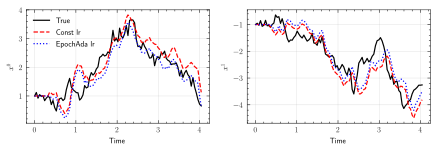

In [34]:
axis=np.linspace(0,eta*(N+1),N+1)

plt.style.reload_library()
with plt.style.context(['science','ieee']):

    fig, ax=plt.subplots(1,2,figsize=(6,2),constrained_layout=True)

    ax[0].plot(axis,x_new[:,0],axis,const_new[:,0], axis, ada_new[:,0],linewidth=1.2)
    ax[0].minorticks_on()
    ax[0].grid(alpha=0.35)
    ax[0].set_xlabel('Time'); ax[0].set_ylabel('$x^0$')

    ax[1].plot(axis, x_new[:,1], axis, const_new[:,1],axis, ada_new[:,1],linewidth=1.2)
    ax[1].minorticks_on(); ax[1].grid(alpha=0.35)
    ax[1].set_xlabel('Time'); ax[1].set_ylabel('$x^1$')

    ax[0].legend(["True","Const lr","EpochAda lr"],edgecolor="black",prop={'size':8})

plt.savefig("../img/ex3-path.pdf", dpi=600, bbox_inches = 'tight') 

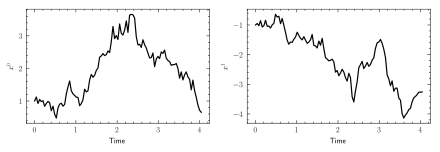

In [35]:
axis=np.linspace(0,eta*(N+1),N+1)

plt.style.reload_library()
with plt.style.context(['science','ieee']):

    fig, ax=plt.subplots(1,2,figsize=(6,2),constrained_layout=True)
    ax[0].plot(axis,x_new[:,0],linewidth=1.2)
    ax[0].minorticks_on()
    ax[0].set_xlabel('Time'); ax[0].set_ylabel('$x^0$')

    ax[1].plot(axis, x_new[:,1],linewidth=1.2)
    ax[1].minorticks_on()
    ax[1].set_xlabel('Time'); ax[1].set_ylabel('$x^1$')